In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder,normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.preprocessing import StandardScaler


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [135]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 17.4MB/s]


In [136]:
!unzip \*.zip  && rm *.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [137]:
df = pd.read_csv("diabetes.csv",index_col = 0)
df.head(20)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [138]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [140]:
df.shape

(768, 8)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [142]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [143]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std

array([[ 0.84832379,  0.14964075,  0.90726993, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-1.12339636, -0.16054575,  0.53090156, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.94372388, -0.26394125, -1.28821221, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.00330087,  0.14964075,  0.15453319, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [ 0.1597866 , -0.47073225, -1.28821221, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.8730192 ,  0.04624525,  0.65635768, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [144]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()


In [145]:
pca.fit(df_std)

PCA()

In [146]:
pca.explained_variance_ratio_

array([0.287773  , 0.17927035, 0.13659066, 0.1092815 , 0.10317038,
       0.07421412, 0.06084113, 0.04885886])

Text(0, 0.5, 'Cumulative Explained Variance')

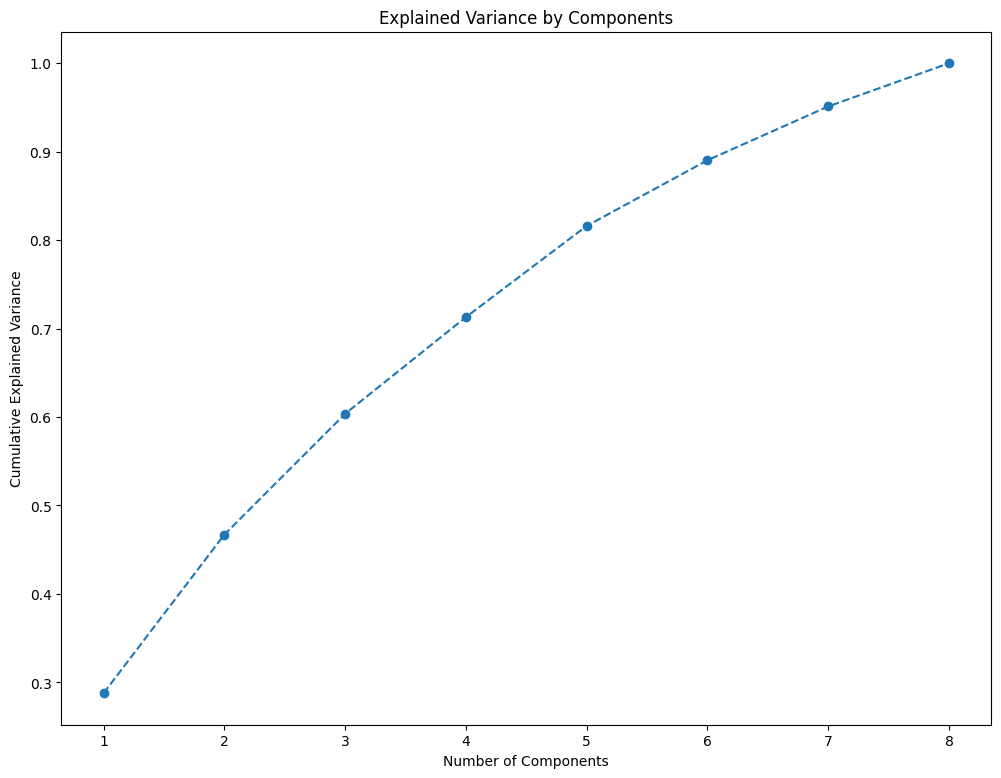

In [148]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep.
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [149]:
pca = PCA(n_components = 5)

In [150]:
pca.fit(df_std)

PCA(n_components=5)

# Sonuç

In [151]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features.
pca.components_

array([[ 0.42899708,  0.29066028,  0.36864979,  0.38900011,  0.42846141,
         0.26552708,  0.1863532 ,  0.39426263],
       [ 0.3346902 ,  0.06787442, -0.52416931, -0.32310366, -0.15235451,
        -0.10863129,  0.58451839,  0.3571438 ],
       [ 0.27105166, -0.71410071, -0.14509542,  0.24966508, -0.2632183 ,
         0.3474301 , -0.24477372,  0.28861761],
       [-0.30123609,  0.13037622, -0.03409682, -0.31343775, -0.01510272,
         0.8733941 ,  0.15647357, -0.07296376],
       [ 0.14567442,  0.20853422,  0.02578727,  0.52232932, -0.59100057,
         0.10088219,  0.33523271, -0.43584364]])

In [152]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])
df_pca_comp

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Component 1,0.428997,0.290660,0.368650,0.389000,0.428461,0.265527,0.186353,0.394263
Component 2,0.334690,0.067874,-0.524169,-0.323104,-0.152355,-0.108631,0.584518,0.357144
Component 3,0.271052,-0.714101,-0.145095,0.249665,-0.263218,0.347430,-0.244774,0.288618
Component 4,-0.301236,0.130376,-0.034097,-0.313438,-0.015103,0.873394,0.156474,-0.072964
Component 5,0.145674,0.208534,0.025787,0.522329,-0.591001,0.100882,0.335233,-0.435844


([<matplotlib.axis.YTick at 0x78111a41a860>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4'),
  Text(0, 4, 'Component 5')])

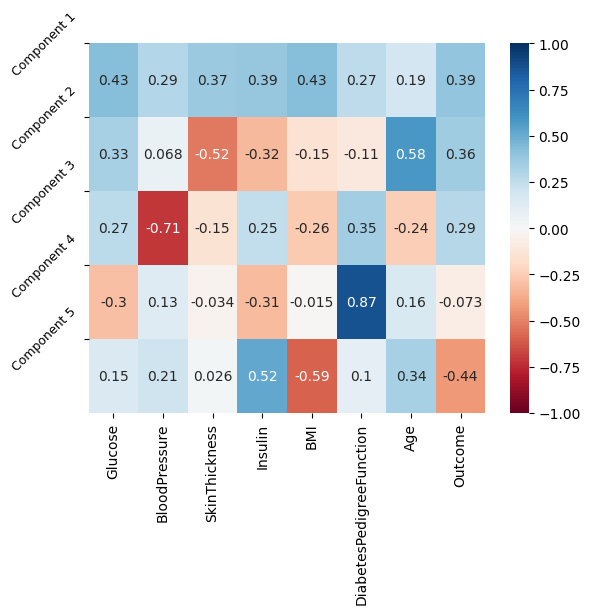

In [157]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3, 4],
           ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'],
           rotation = 45,
           fontsize = 9)

In [ ]:
# Bileşen 1 genellikle pozitif korelasyonlar gösteriyor, bu da bu bileşenin arttıkça, sağlık parametrelerinin de genellikle arttığını gösteriyor. Ancak cilt kalınlığı ile hafif negatif bir ilişkisi var.
# Bileşen 3, glukoz ile güçlü negatif bir korelasyon (-0.71) sergiliyor, yani bu bileşenin değeri arttıkça, glukoz seviyesinin düştüğünü gösteriyor.
# Bileşen 4, BMI ile çok güçlü pozitif bir korelasyon (0.87) gösteriyor, bu da bu bileşenin yüksek değerlerinin yüksek BMI değerleri ile ilişkili olduğunu gösteriyor.
# Sonuç ile ilgili olarak, Bileşen 1 ve 2 ile orta düzeyde pozitif korelasyonlar ve Bileşen 4 ve 5 ile orta düzeyde negatif korelasyonlar görülüyor.

In [159]:
pca.transform(df_std)

array([[ 1.48842284,  1.2817615 , -0.02730654,  0.47977356, -0.37432266],
       [-1.31677768, -0.67028516, -0.55118662,  0.23163002,  0.07748015],
       [ 0.2193282 ,  2.06028211,  1.64970203,  0.06952773, -0.08474125],
       ...,
       [-0.6263328 , -0.39629367, -0.24692662, -0.65146041,  0.77373105],
       [-0.25747322,  2.16969027,  0.43533551, -0.08536573, -0.56834927],
       [-1.05208755, -1.09776234, -0.64729868, -0.0298646 , -0.36388557]])

# K-means clustering with PCA

In [160]:
scores_pca = pca.transform(df_std)

In [161]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=10)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

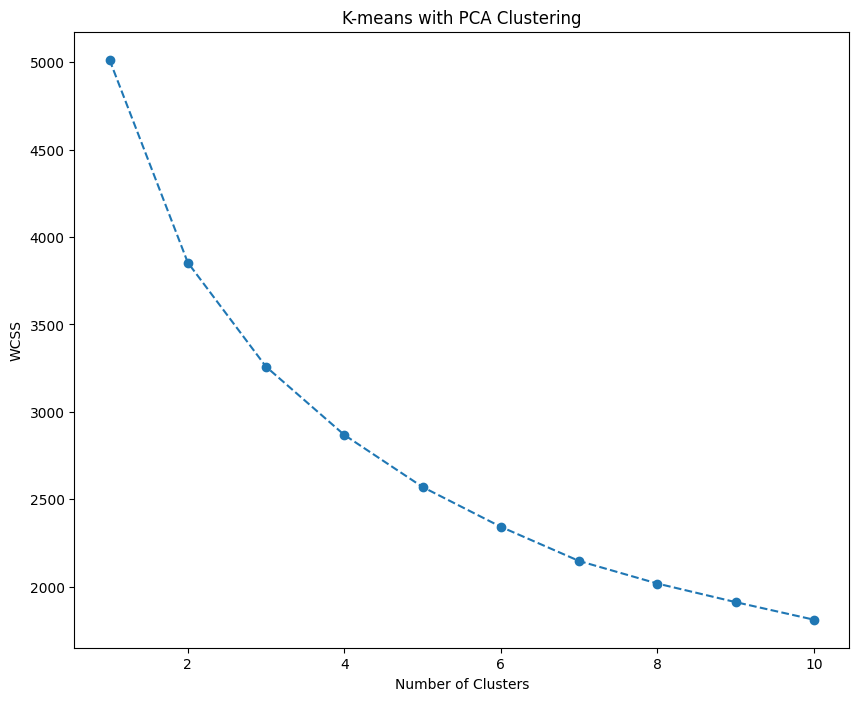

In [162]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [163]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [164]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

# K-means clustering with PCA Results

In [184]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-5: ] = ['MAİ', 'İDİ', 'GTİİ', 'VKİİ', 'Yİİ']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

# ['Metabolik_Aktivite_İndeksi MAİ', 'İnsülin Duyarlılık İndeksi İDİ', 'Glukoz Ters İlişki İndeksi GTİİ', 'Vücut Kitle İlişki İndeksi VKİİ', 'Yaş İlişki İndeksi Yİİ']

In [185]:
df_segm_pca_kmeans

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MAİ,İDİ,GTİİ,VKİİ,Yİİ,Segment K-means PCA
0,148,72,35,0,33.6,0.627,50,1,1.488423,1.281761,-0.027307,0.479774,-0.374323,0
1,85,66,29,0,26.6,0.351,31,0,-1.316778,-0.670285,-0.551187,0.231630,0.077480,4
2,183,64,0,0,23.3,0.672,32,1,0.219328,2.060282,1.649702,0.069528,-0.084741,0
3,89,66,23,94,28.1,0.167,21,0,-1.308869,-1.160812,-0.293776,-0.670436,0.058516,4
4,137,40,35,168,43.1,2.288,33,1,3.006376,-0.991208,3.204475,4.047336,-0.698955,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0,0.801307,-0.068542,-1.633162,-0.443154,1.490702,1
764,122,70,27,0,36.8,0.340,27,0,-0.323716,-0.595487,-0.635766,-0.187784,-0.596485,1
765,121,72,23,112,26.2,0.245,30,0,-0.626333,-0.396294,-0.246927,-0.651460,0.773731,4
766,126,60,0,0,30.1,0.349,47,1,-0.257473,2.169690,0.435336,-0.085366,-0.568349,0


In [198]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

<ipython-input-198-2c12f21730bc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MAİ,İDİ,GTİİ,VKİİ,Yİİ
Segment K-means PCA,,,,,,,,,,,,,
0,138.700000,77.961111,10.088889,24.438889,32.206111,0.451894,45.027778,0.694444,0.411808,1.563936,-0.265192,0.115761,-0.093138
1,109.694581,71.246305,32.620690,101.428571,35.365025,0.422975,28.605911,0.113300,0.110050,-1.024084,-0.447281,-0.125779,-0.094926
2,154.352941,75.352941,36.361345,238.932773,38.206723,0.731782,34.890756,0.848739,2.432459,-0.343266,0.587515,-0.121152,0.170342
3,118.388889,1.500000,1.472222,0.000000,25.702778,0.388806,30.472222,0.472222,-2.110500,0.690777,2.730351,-0.436890,-0.878220
4,99.926087,67.634783,12.843478,34.191304,26.618261,0.409204,27.686957,0.008696,-1.347609,-0.250603,-0.129019,0.151484,0.206000


In [199]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Age']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'MAİ',
                                                          1:'İDİ',
                                                          2:'GTİİ',
                                                          3:'VKİİ',
                                                          4:'Yİİ',
                                                          })

df_segm_pca_kmeans_freq

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,MAİ,İDİ,GTİİ,VKİİ,Yİİ,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,
MAİ,138.700000,77.961111,10.088889,24.438889,32.206111,0.451894,45.027778,0.694444,0.411808,1.563936,-0.265192,0.115761,-0.093138,180,0.234375
İDİ,109.694581,71.246305,32.620690,101.428571,35.365025,0.422975,28.605911,0.113300,0.110050,-1.024084,-0.447281,-0.125779,-0.094926,203,0.264323
GTİİ,154.352941,75.352941,36.361345,238.932773,38.206723,0.731782,34.890756,0.848739,2.432459,-0.343266,0.587515,-0.121152,0.170342,119,0.154948
VKİİ,118.388889,1.500000,1.472222,0.000000,25.702778,0.388806,30.472222,0.472222,-2.110500,0.690777,2.730351,-0.436890,-0.878220,36,0.046875
Yİİ,99.926087,67.634783,12.843478,34.191304,26.618261,0.409204,27.686957,0.008696,-1.347609,-0.250603,-0.129019,0.151484,0.206000,230,0.299479


In [200]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map(
                                                         {0:'MAİ',
                                                          1:'İDİ',
                                                          2:'GTİİ',
                                                          3:'VKİİ',
                                                          4:'Yİİ'})

<ipython-input-201-dc237245ede9>:9: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='GTİİ', y='MAİ', hue='Legend', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'm'])


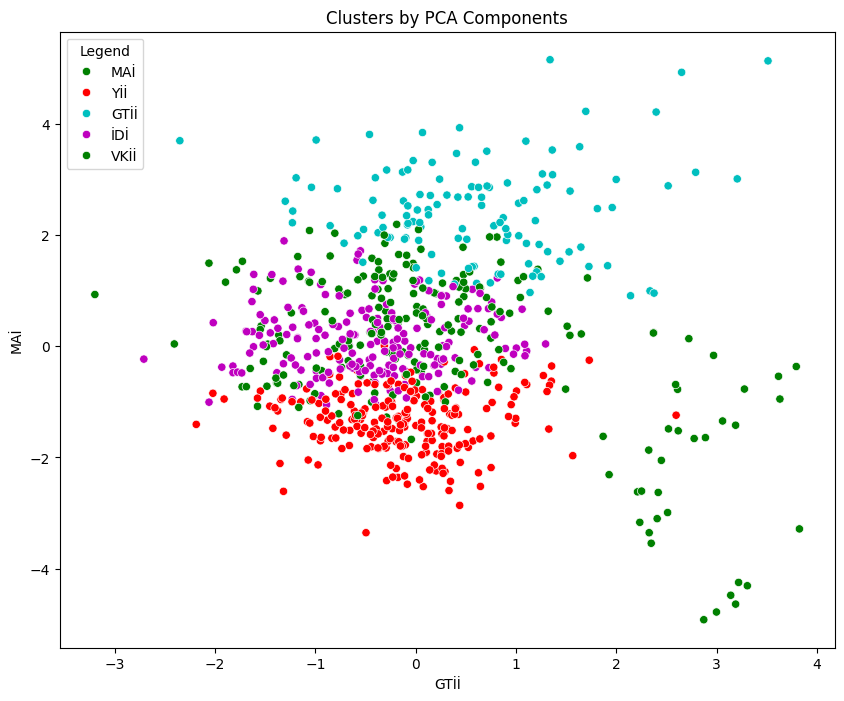

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri çerçevesi ve PCA bileşenlerini varsayıyoruz
# df_segm_pca_kmeans['Component 2'] ve df_segm_pca_kmeans['Component 1'] mevcut ve doğru
# df_segm_pca_kmeans['Legend'] sütunu da mevcut ve kategorik veri içeriyor

plt.figure(figsize = (10, 8))
sns.scatterplot(x='GTİİ', y='MAİ', hue='Legend', data=df_segm_pca_kmeans, palette=['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()
